In [118]:
import os
import requests
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

warnings.filterwarnings("ignore")

In [119]:
url = "https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"

In [120]:
df = pd.read_csv(url)

In [121]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [122]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [123]:
df.shape

(1453, 15)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [125]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

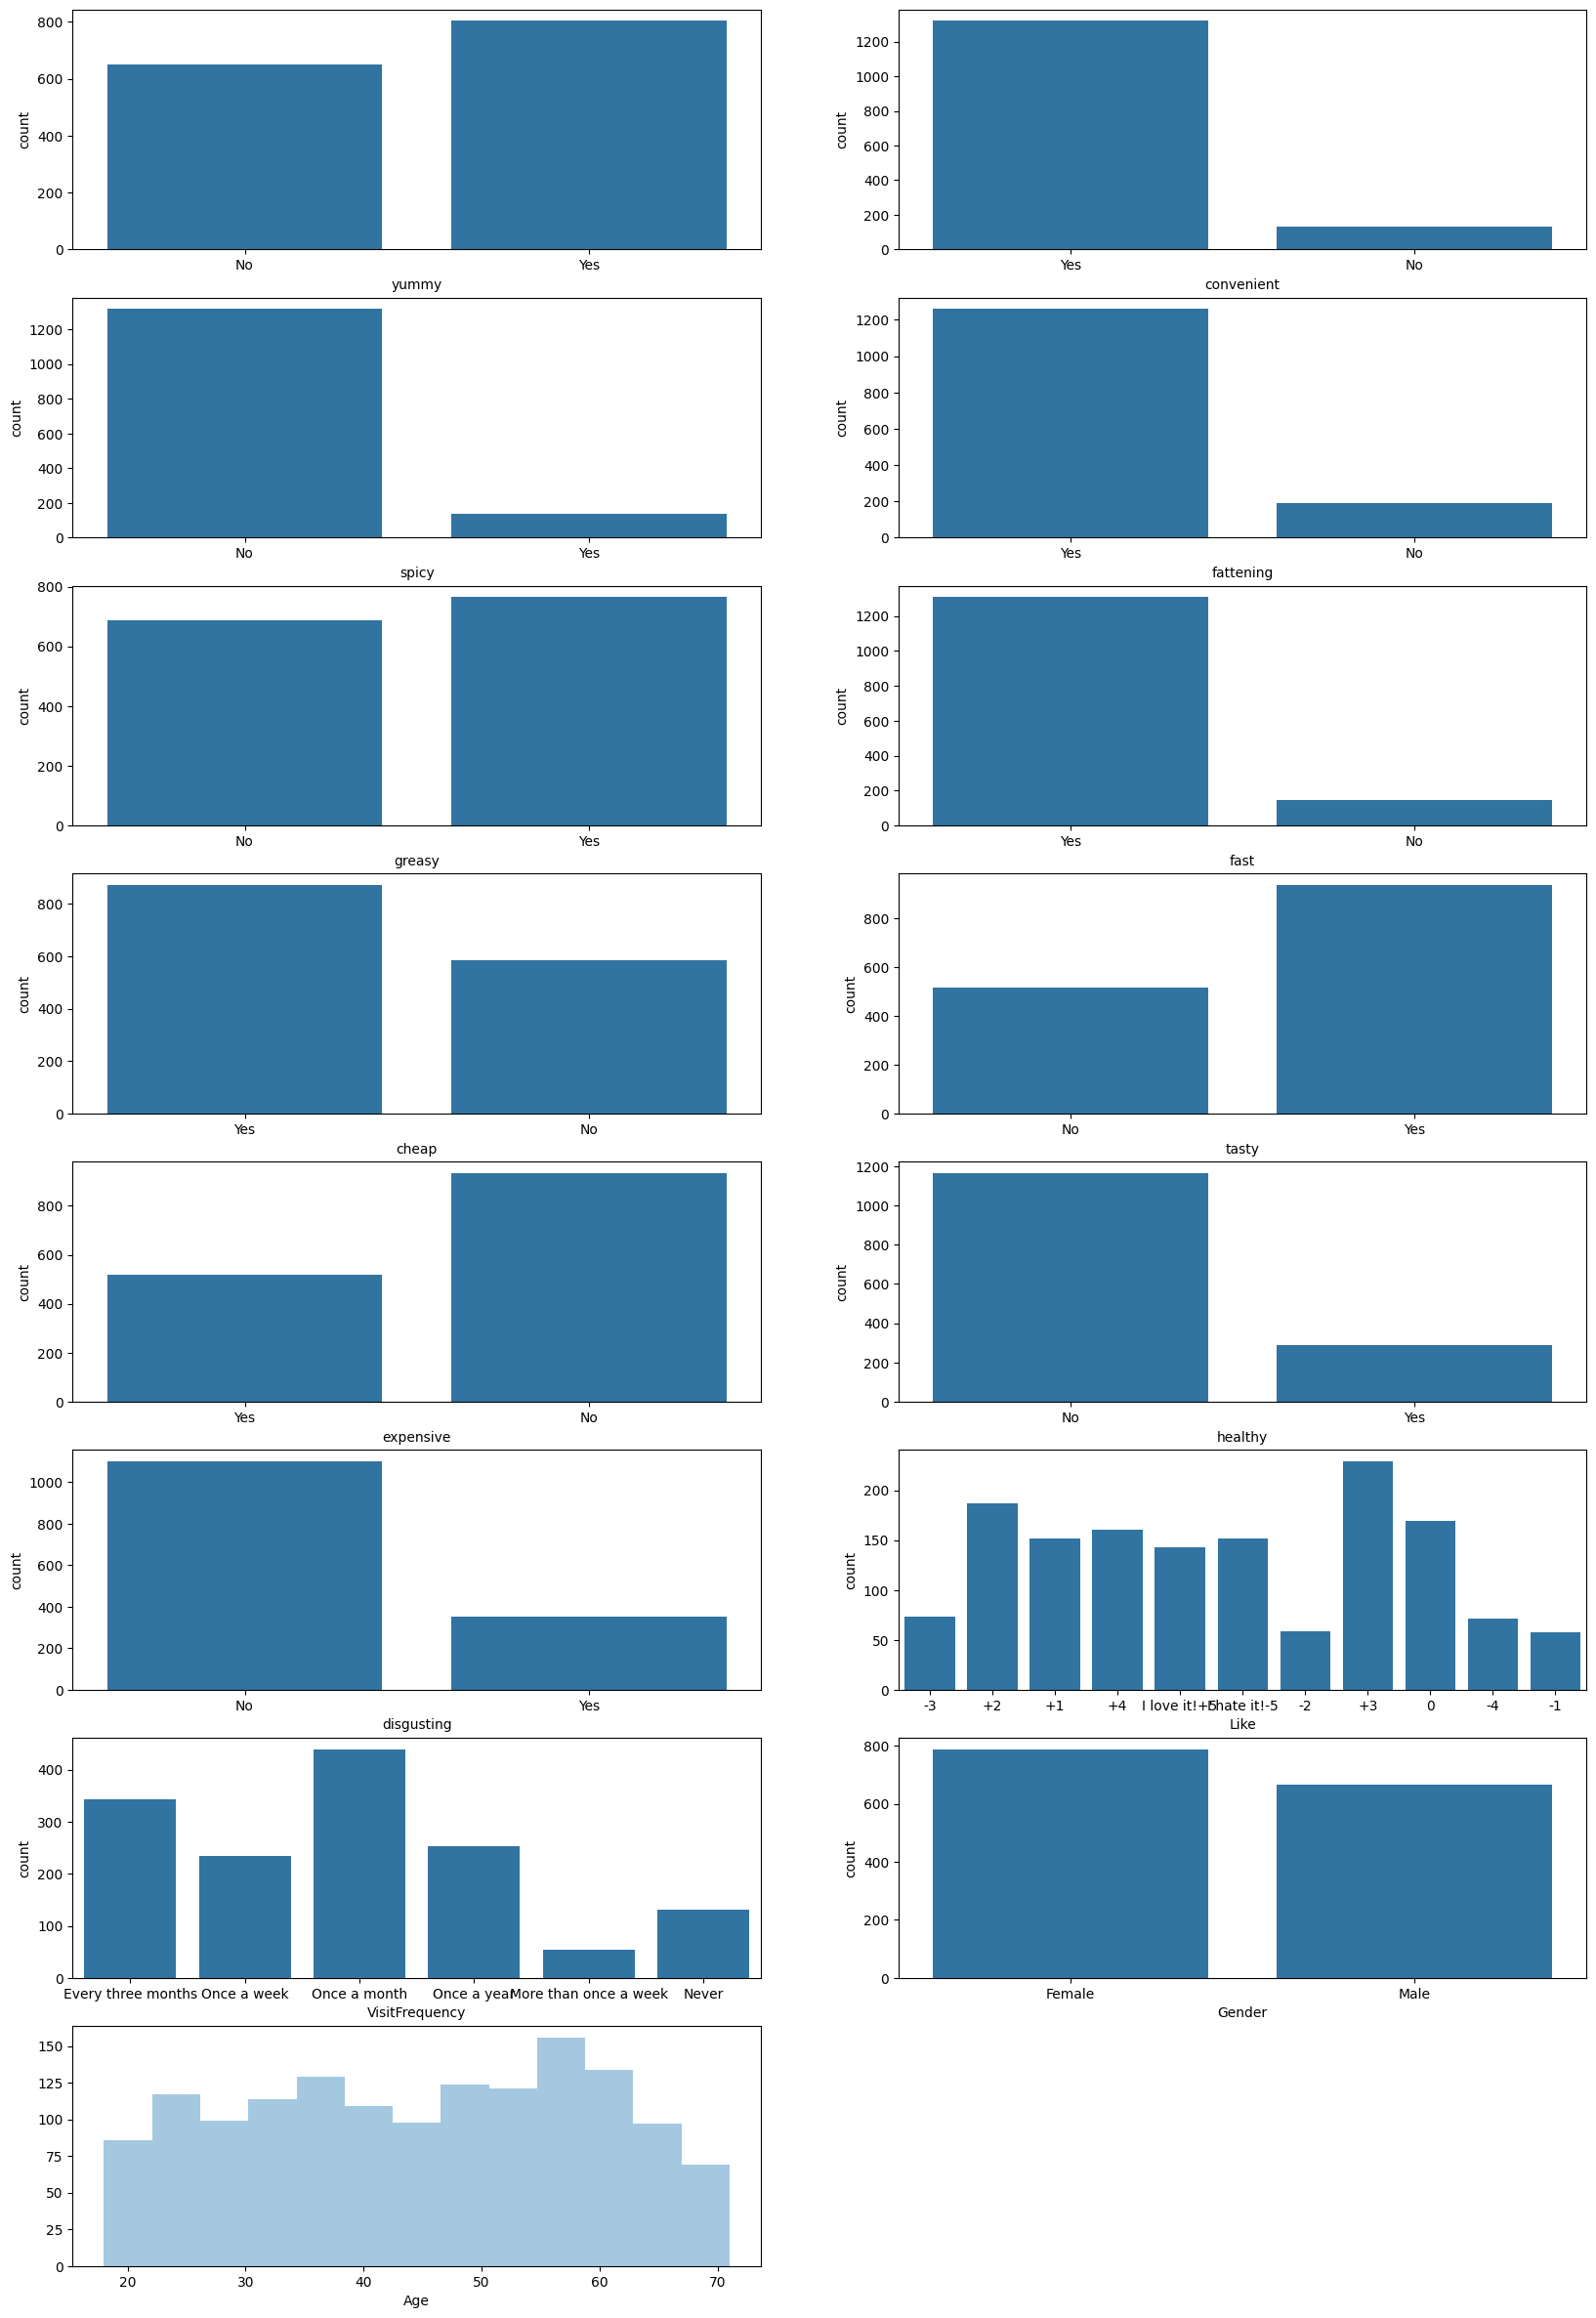

In [126]:
def EDA(df, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if df[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=df, x=i)
        else:
            con.append(i)

    for i in con:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(df[i].dropna(), kde=False)  # Exclude missing values
# Applying the function on the dataset
EDA(df, (20, 30))

In [127]:
# Converting categorical into numerical
df = df.replace({"Yes": 1, "No": 0})

In [128]:
df1 = df.iloc[:, :11]
col_means = df1.mean().round(2)
col_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

From the above insights:
91% believe McDonald's is convenient and
9% believe McDonald's is spicy

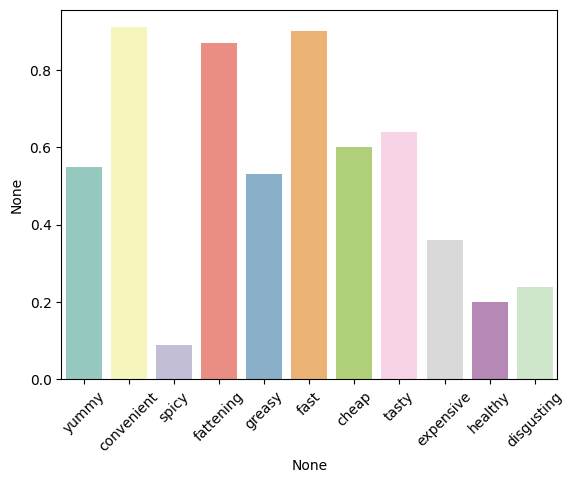

In [129]:
sns.barplot(x=col_means.index, y=col_means, palette="Set3")
plt.xticks(rotation=45)
plt.show()

In [130]:
# Perform PCA

scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

pca = PCA()
df2 = pca.fit_transform(df2)

pca_df = pd.DataFrame(df2, columns=df1.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [131]:
summ = pca_df.describe().loc["std"].to_frame()
std_deviations = summ["std"]
summ["variance"] =  [(std_dev ** 2) / np.sum(np.square(std_deviations)) for std_dev in std_deviations]
summ["Cumulative Proportion"] = np.cumsum(summ["variance"])
summ

,std,variance,Cumulative Proportion
yummy,1.677250,0.255566,0.255566
convenient,1.277868,0.148348,0.403914
spicy,1.175207,0.125469,0.529383
fattening,1.040053,0.098270,0.627653
greasy,0.958620,0.083484,0.711136
fast,0.884613,0.071091,0.782227
cheap,0.845774,0.064986,0.847213
tasty,0.769870,0.053845,0.901058
expensive,0.724065,0.047628,0.948686
healthy,0.554809,0.027964,0.976650


In [132]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram

In [133]:
pd.DataFrame(
    pca.components_,
    columns=[f'PC{i}' for i in range(1, 12)],
    index=pca_df.columns
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,-0.308827,-0.023320,0.177861,0.267796,-0.213039,-0.289134,-0.426115,0.290944,-0.266839,0.410744
convenient,0.282615,-0.045682,0.069982,-0.205590,-0.136300,-0.282441,-0.575032,0.242199,0.567528,0.201031,-0.143888
spicy,-0.259588,-0.317151,0.020170,-0.608077,-0.389568,-0.211395,0.125157,-0.269648,-0.183298,0.367814,0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,0.346857,-0.437148,-0.185551,0.086934,0.343713,-0.568939,0.256981,0.286099,-0.207362,0.051787,0.105843
fast,-0.124916,0.188966,0.438661,0.107520,-0.278329,-0.572734,0.020657,-0.053053,-0.171160,-0.446166,-0.328041
cheap,0.159878,-0.661814,0.214188,-0.023851,-0.307300,0.392436,-0.008895,0.197364,0.015198,-0.449446,-0.017070
tasty,0.016587,0.150033,-0.027835,-0.720478,0.487275,0.055976,-0.064667,0.059289,-0.061727,-0.446110,-0.079122
expensive,-0.195341,-0.336539,0.025239,0.105052,0.346137,0.099235,-0.062027,-0.213587,-0.009675,0.219269,-0.780777
healthy,0.691446,0.028831,0.058187,-0.020311,-0.015160,0.017917,0.060323,-0.713426,0.029581,-0.054544,-0.016028


In [134]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)

KMeans(n_clusters=4)

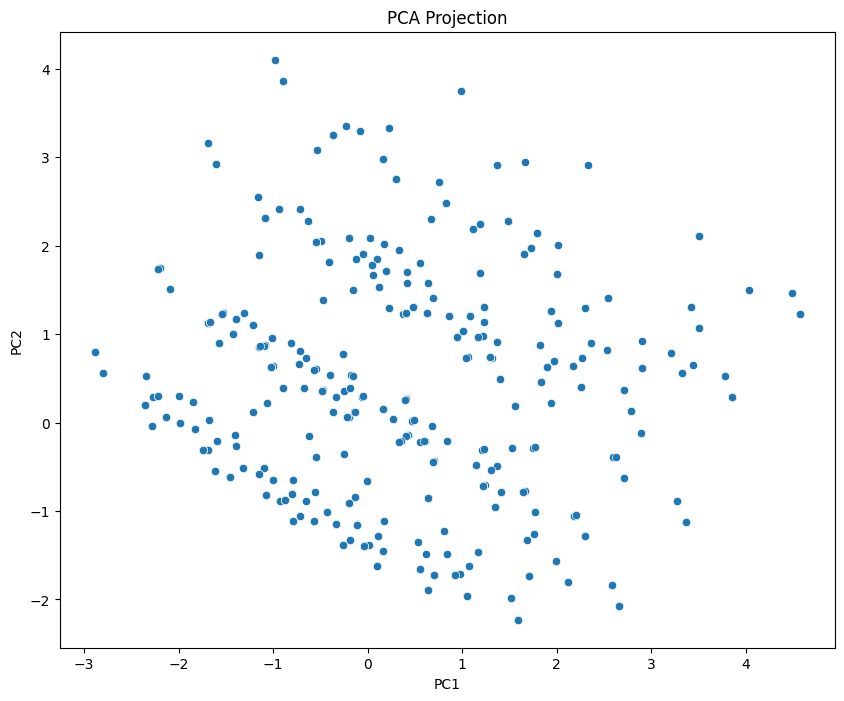

In [135]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='yummy', y='convenient',  palette ="Set2")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

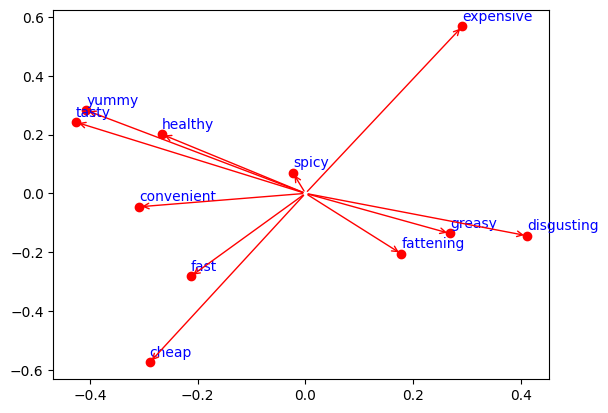

In [136]:
scale = 1
for i,j in enumerate(pca_df.columns):
    plt.text(
        pca.components_[0, :][i]*scale,
        (pca.components_[1, :][i]+0.02)*scale,
        j, color='blue'
    )
    # plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate(
        '', xytext=(0, 0),
        xy=(pca.components_[0, :][i]*scale,
        pca.components_[1, :][i]*scale),
        arrowprops=dict(
            arrowstyle="->",
            color='red'
        )
    )
plt.scatter(
    pca.components_[0, :]*scale,
    pca.components_[1, :]*scale,
    color='red'
)

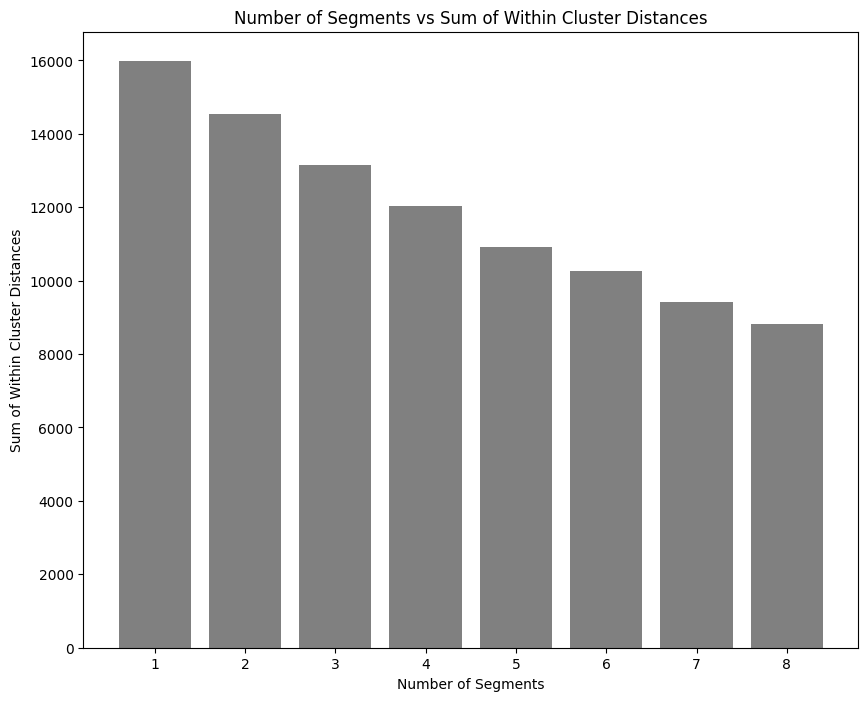

In [137]:
np.random.seed(1234)

scaler = StandardScaler()
pca_df_scaled = scaler.fit_transform(pca_df)

# Define the range of cluster numbers to evaluate
k_range = range(1, 9)

# Calculate the sum of within-cluster distances for each number of clusters
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(pca_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 8))
plt.bar(k_range, inertia, color='gray')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within Cluster Distances')
plt.title('Number of Segments vs Sum of Within Cluster Distances')
plt.show()


##  Step 5: Extracting Segments

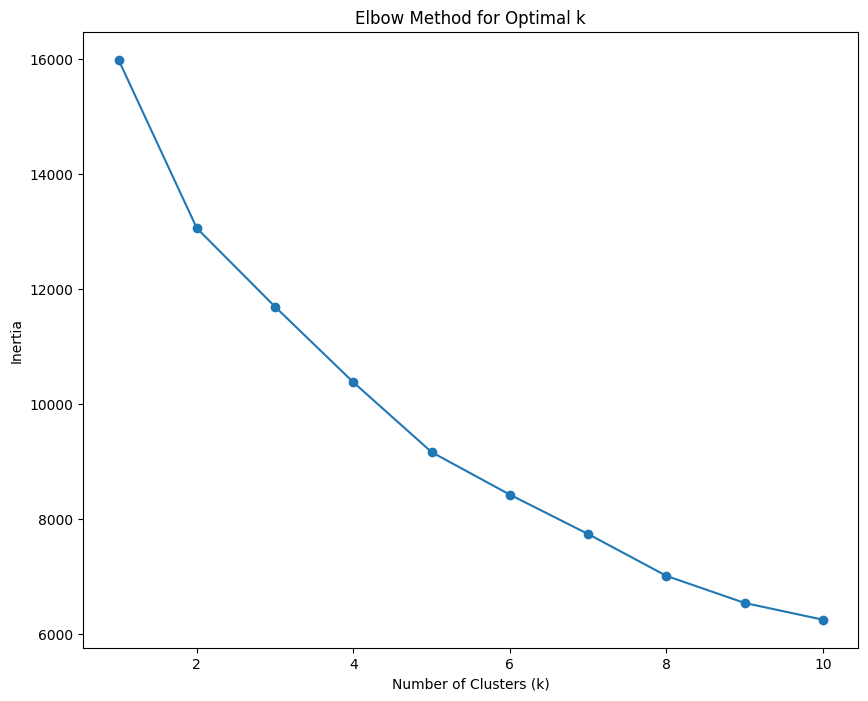

In [138]:
inertia = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for each k
plt.figure(figsize=(10, 8))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [139]:
np.random.seed(1234)

In [140]:
k_range = range(2, 9)
k_result = []

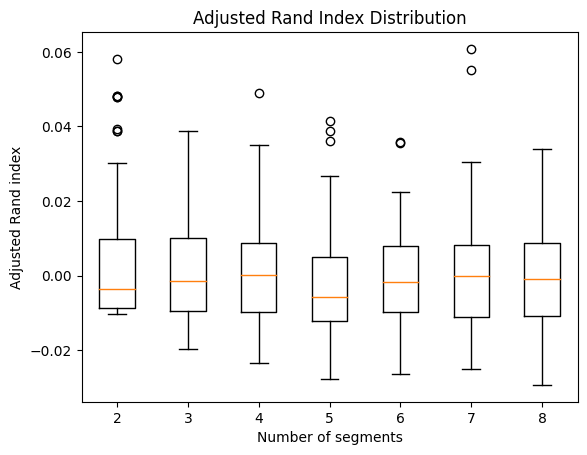

In [141]:
import numpy as np
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

n_boot = 100
ARI_scores = []
k_result = [np.random.randint(0, k, 100) for k in range(2, 9)]  # Example clustering results for k=2 to k=8

for labels in k_result:
    ari_boot = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ari = adjusted_rand_score(labels, random_sample)
        ari_boot.append(ari)
    ARI_scores.append(ari_boot)

# Ensure the labels match the length of ARI_scores
plt.boxplot(ARI_scores, labels=range(2, 2 + len(ARI_scores)))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()


In [142]:
gmm = GaussianMixture(
    n_components=4,
    covariance_type='full',
    random_state=1234
)
gmm.fit(pca_df)

cluster_assignments_gmm = gmm.predict(pca_df)

model = KMeans(
    n_clusters=4,
    n_init=10,
    random_state=0
)
model.fit(pca_df)
labels = model.predict(pca_df)

conf_matrix = confusion_matrix(
    labels,
    cluster_assignments_gmm
)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[116   4   0  96]
 [  7 163  97   3]
 [  6  71 268 269]
 [  5  55 222  71]]


## Step 6: Profiling Segments

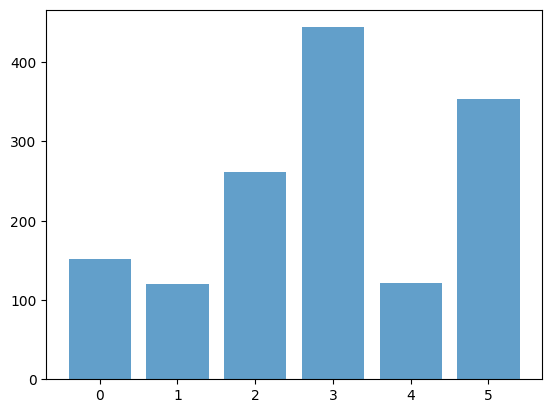

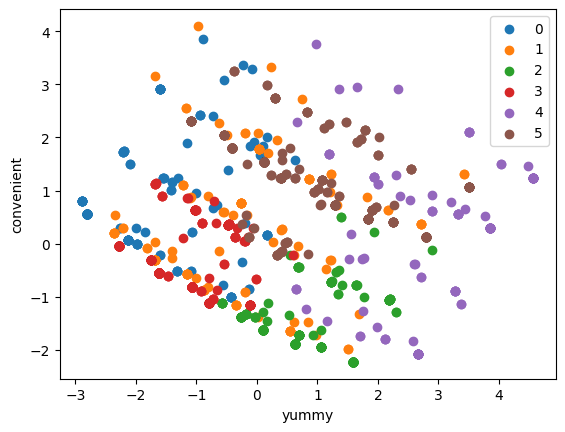

In [143]:
k6 = KMeans(n_clusters=6)
k6.fit(pca_df)
l6 = k6.predict(pca_df)

x = range(6)
height = []
for i in range(6):
    height.append(sum(l6 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(6):
    temp = pca_df[['yummy', 'convenient']][l6 == i]
    plt.scatter(
        temp['yummy'],
        temp['convenient'],
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

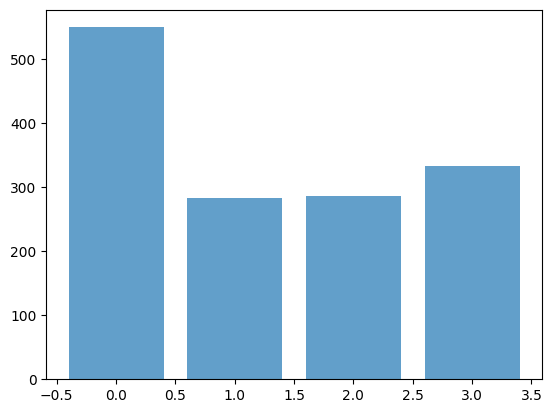

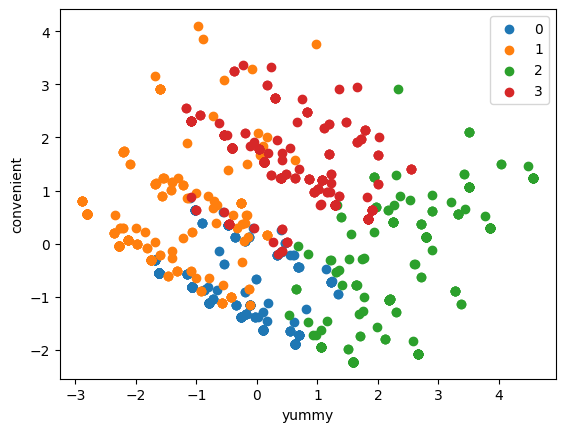

In [144]:
k4 = KMeans(n_clusters=4)
k4.fit(pca_df)
l4 = k4.predict(pca_df)

x = range(4)
height = []
for i in range(4):
    height.append(sum(l4 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(4):
    temp = pca_df[['yummy', 'convenient']][l4 == i]
    plt.scatter(
        temp['yummy'],
        temp['convenient'],
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

## Step 7: Describing Segments

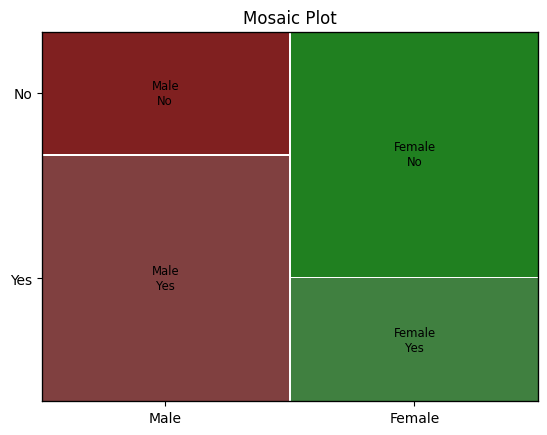

In [145]:
#crosstab creation

# Create a sample data frame
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}
example_df = pd.DataFrame(data)

# Create a mosaic plot
mosaic(example_df, ['Gender', 'Preference'], title='Mosaic Plot')

plt.show()

In [146]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [147]:
df2 = df
df2['segments'] = l4
df2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0


<Figure size 1600x1000 with 0 Axes>

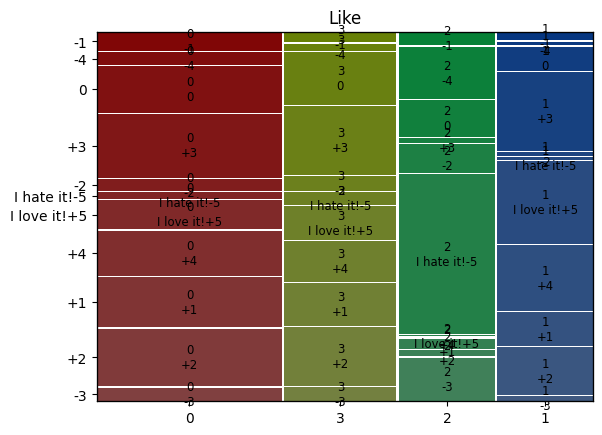

In [148]:
plt.figure(figsize=(16,10 ))
mosaic(df2, ['segments', 'Like'], title='Like');
plt.show()

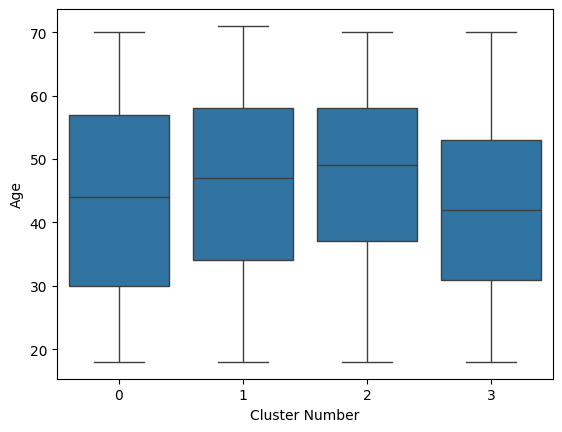

In [149]:
sns.boxplot(x=df['segments'], y=df['Age'])
plt.xlabel('Cluster Number')
plt.show()

## Step 8: Selecting Target Segments

In [150]:
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3


In [151]:
df2.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [152]:
df2.Like = df2.Like.str.extract(r'([-\d]+)').astype(int)

In [153]:
df2.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [154]:
df2.VisitFrequency = df2.VisitFrequency.replace({
    'Every three months':1/(4*3),
    'Once a week':1,
    'Once a month':1/4,
    'Once a year':1/52,
    'More than once a week':2,
    'Never':0
})

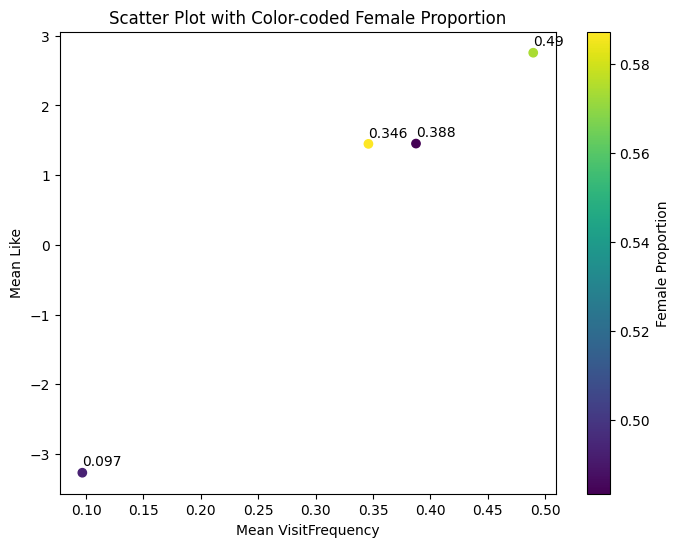

In [155]:
visit_means = (df2.groupby("segments")["VisitFrequency"]
               .mean())
like_means = df2.groupby("segments")["Like"].mean()
female_means = (df2.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

plt.figure(figsize=(8, 6))
plt.scatter(
    visit_means,
    like_means,
    c=female_means,
    cmap="viridis"
)
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like")
plt.title("Scatter Plot with Color-coded Female Proportion")
plt.colorbar(label="Female Proportion")
for i,j,k in zip(
    visit_means,
    like_means,
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()